# Linear Algebra and Machine Learning - Assignment - 1

* To smooth or remove the noise from the given time series data (google stock price of 9 years). I have used pandas emw() function which is used to describe time series data.
* It gives more weightage to recent observations and less to older data.
* Smaller the alpha value, gives more weightage to recent data. Here, this emw is used to smooth out the data.

In [17]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_google = pd.read_csv("/content/drive/MyDrive/GOOG.csv")
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [5]:
df_google.info() # check the data types in google csv dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2360 non-null   object 
 1   open    2360 non-null   float64
 2   high    2360 non-null   float64
 3   low     2360 non-null   float64
 4   close   2360 non-null   float64
 5   volume  2360 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.8+ KB


In [6]:
df_google.dtypes # short - check the data types in google csv dataframe

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [7]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d')
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2360 non-null   datetime64[ns]
 1   open    2360 non-null   float64       
 2   high    2360 non-null   float64       
 3   low     2360 non-null   float64       
 4   close   2360 non-null   float64       
 5   volume  2360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.8 KB


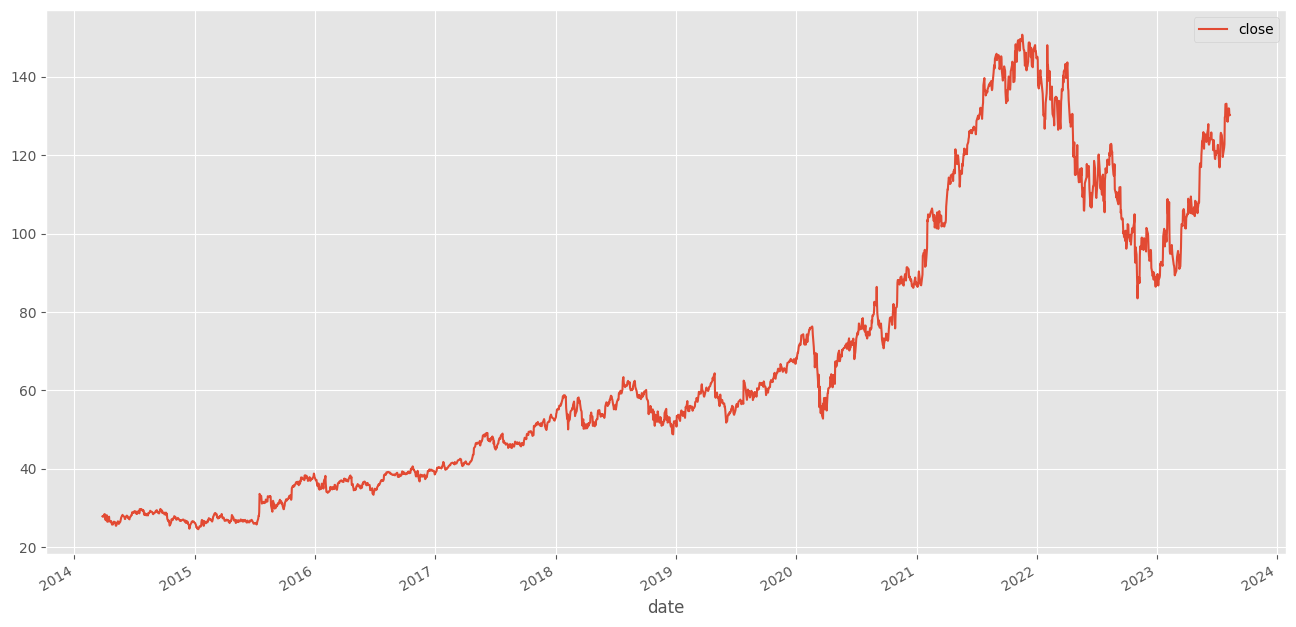

In [8]:
style.use("ggplot")
df_google.plot(x="date", y="close", figsize=(16,8))
plt.show()

In [25]:
start = time.time()
arr = df_google['close']
window_size = 30

i = 0
moving_averages = []

while i < len(arr) - window_size + 1:

    window = arr[i : i + window_size]
    window_average = round(np.sum(window) / window_size, 2)
    moving_averages.append(window_average)
    i += 1
end = time.time()
print(end-start)

0.5560810565948486


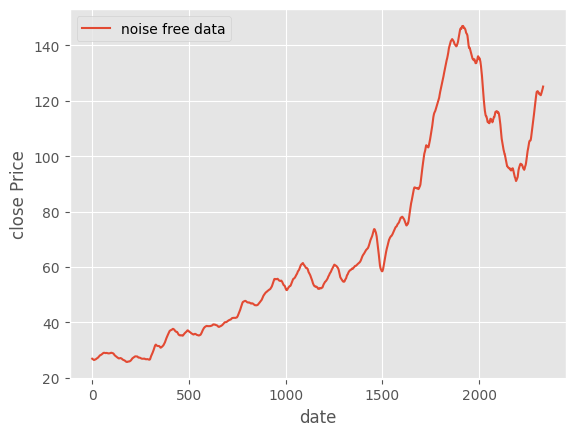

In [26]:
plt.plot(moving_averages, label='noise free data')
plt.xlabel('date')
plt.ylabel('close Price')
plt.legend()
plt.show()

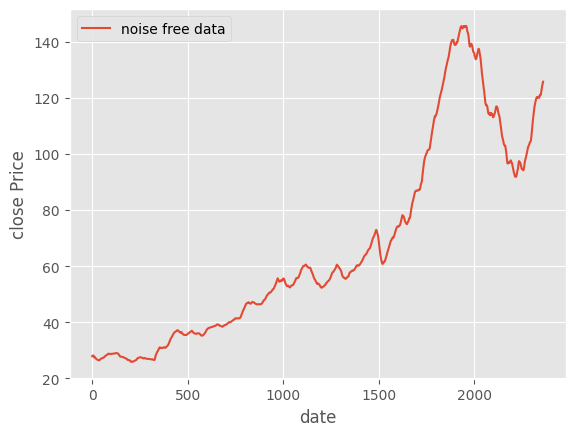

In [27]:
start = time.time()
noise_free_close_price = df_google['close'].ewm(alpha=0.055).mean()
end = time.time()

plt.plot(noise_free_close_price, label='noise free data')
plt.xlabel('date')
plt.ylabel('close Price')
plt.legend()
plt.show()

In [28]:
end - start

0.001115560531616211